# Problem 1

1. We know that indecomposables of type-A quiver representations are bars $I[b,d]$.  Chain maps impose a condition that $\partial_{k} \partial_{k+1} = 0$, so the only possible indecomposables are either $I[k,k+1]$ or $I[k,k]$ for $k=0,1,\dots$.
2. $H_k = \ker \partial_k / img \partial_{k+1}$.  There are only 3 types of indecomposables relevant at location $k$: $I[k-1,k]$, which is not in the kernel of $\partial_k$, $I[k,k+1]$ which is in the kernel of $\partial_k$, but also in the image $\partial_{k+1}$, so is removed by the quotient operation, and $I[k,k]$ which is in the kernel, but not in the image, so preserved by the quotient operation.  Thus, the number of indecomposables of the form $I[k,k]$ is the dimension of $H_k$, and the vectors associated with each $I[k,k]$ are homology representatives. 

# Problem 2.1

In [11]:
import dionysus as d

def LowerStar(X, f):
    '''
    Lower star filtration of X induced by function f: X_0 \to R
    f[i] = f(x_i)
    
    X: simplicial complex in Dionysus
    f: vector or list
    '''
    F = d.Filtration()
    
    # the following loop iterates over simplices in X
    for s in X:
        fs = max(f[i] for i in s)
        F.append(d.Simplex(s, fs))
        
    return F
    

# Problem 2.2

In [55]:
import dionysus as d
from itertools import combinations
import numpy as np

def VietorisRips(D, k):
    """
    Vietoris Rips filtration of metric space defined by pairwise distance matrix D
    
    D: n x n matrix of pairwise distances
    k: maximum simplex dimension
    """
    def max_d(spx):
        """
        return maximum pairwise distance in simplex
        """
        return np.max(D[list(spx)][:,list(spx)])
    
    F = d.Filtration()
    
    n = len(D)
    
    for dim in range(1,k+2):
        for spx in combinations(range(n), dim):
            F.append(d.Simplex(spx, max_d(spx)))
            
    F.sort() # need to sort by filtration order to compute PH
    return F
    

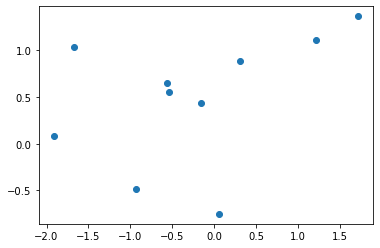

In [56]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

X = np.random.randn(10,2)
D = squareform(pdist(X))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [57]:
F = VietorisRips(D, 2)
F

Filtration with 175 simplices

# Problem 3

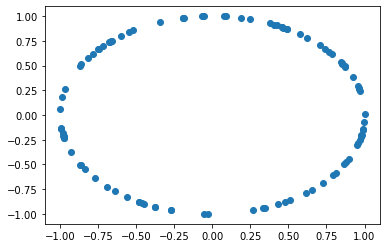

In [64]:
def sample_circle(n):
    """
    generate circle sampled uniformly at random on n points
    """
    thetas = np.random.rand(n) * 2 * np.pi;
    return np.c_[np.cos(thetas), np.sin(thetas)]

X = sample_circle(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [59]:
D = squareform(pdist(X))
%time F = VietorisRips(D, 2)
F

CPU times: user 2.89 s, sys: 18.4 ms, total: 2.91 s
Wall time: 2.92 s


Filtration with 166750 simplices

In [60]:
%time F = d.fill_rips(X, 2, np.inf)
F

CPU times: user 609 ms, sys: 9.73 ms, total: 619 ms
Wall time: 618 ms


Filtration with 166750 simplices

In [61]:
p = d.homology_persistence(F)
dgms = d.init_diagrams(p, F)

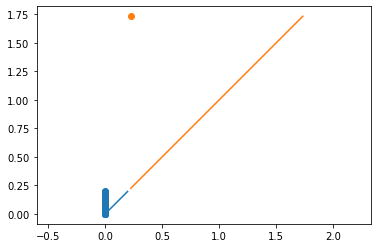

In [62]:
d.plot.plot_diagram(dgms[0])
d.plot.plot_diagram(dgms[1])

# Problem 4

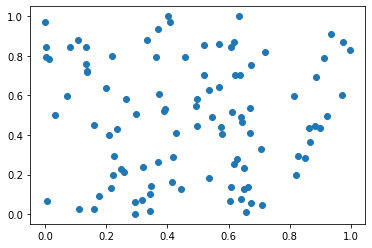

In [65]:
def sample_square(n):
    return np.random.rand(n,2)

X = sample_square(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

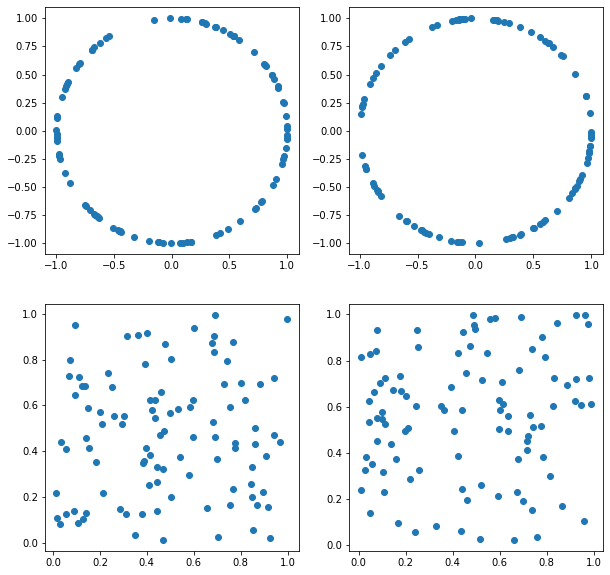

In [67]:
n = 100
X = []
X.append(sample_circle(100))
X.append(sample_circle(100))
X.append(sample_square(100))
X.append(sample_square(100))
X = np.array(X)

fig, ax = plt.subplots(2,2, figsize=(10,10))
for i, a in enumerate(ax.flatten()):
    a.scatter(X[i,:,0], X[i,:,1])
    
plt.show(fig)

In [68]:
def get_h1_dgm(X):
    F = d.fill_rips(X, 2, np.inf)
    p = d.homology_persistence(F)
    dgms = d.init_diagrams(p, F)
    return dgms[1]

In [71]:
dgms1 = [get_h1_dgm(Xi) for Xi in X]

In [73]:
DB = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        DB[i,j] = d.bottleneck_distance(dgms1[i], dgms1[j])
        
DB

array([[0.        , 0.05149398, 0.65955955, 0.66471797],
       [0.05148655, 0.        , 0.68526983, 0.68794572],
       [0.65955955, 0.68526983, 0.        , 0.04125406],
       [0.66358221, 0.68970037, 0.04118335, 0.        ]])

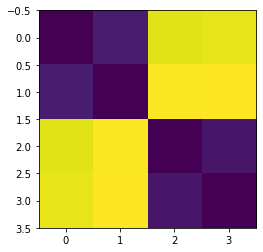

In [75]:
plt.imshow(DB)
plt.show()

note that circle-circle bottleneck distance is small, as is square-square, but inter-class distance is large

# Problem 5

In [1]:
import dionysus as d

In [2]:
def Freudenthal(m, n):
    def to_k(i,j):
        return n * i + j
    
    X = d.Filtration()
    
    # 0-simplices
    for i in range(m):
        for j in range(n):
            X.append(d.Simplex((to_k(i,j),)))
            
    # 1-simplices
    for i in range(m):
        for j in range(n-1):
            X.append(d.Simplex((to_k(i,j),to_k(i,j+1))))
            
    for i in range(m-1):
        for j in range(n):
            X.append(d.Simplex((to_k(i,j),to_k(i+1,j))))
            
    
    for i in range(m-1):
        for j in range(n-1):
            # diagonal 1-simplex
            X.append(d.Simplex((to_k(i,j), to_k(i+1,j+1))))
            # 2-simplices
            X.append(d.Simplex((to_k(i,j), to_k(i,j+1), to_k(i+1,j+1))))
            X.append(d.Simplex((to_k(i,j), to_k(i+1,j), to_k(i+1,j+1))))
        
    return X

X = Freudenthal(512, 512)

In [10]:
s = X[0]
len(s)

1

In [11]:
# load SIPI dataset
import PIL
from PIL import Image
import os
import numpy as np

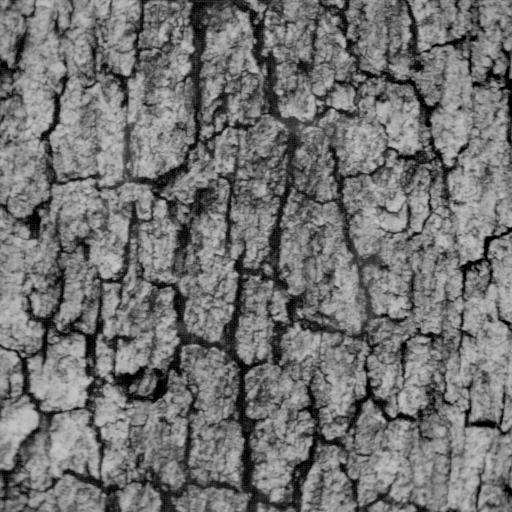

In [7]:
Image.open('rotate/bark.000.tiff')

In [92]:
fnames = os.listdir('rotate')
labels = []
imgs = []
for f in sorted(fnames):
    label = f.split('.')[0]
    labels.append(label)
    img = Image.open('rotate/'+f)
    imgs.append(np.array(img))
    
imgs = np.array(imgs)

In [93]:
imgs.shape

(91, 512, 512)

In [94]:
labels

['bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'water',
 'water',
 'water',
 'water',
 'water',
 'water',
 'water',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool']

In [41]:
def lower_star(X, f):
    F = d.Filtration()
    for s in X:
        fs = max(f[i] for i in s)
        F.append(d.Simplex(s, fs))
        
    return F
        

In [67]:
from tqdm import tqdm

In [69]:
dgms = []
for img in tqdm(imgs):
    f = img.flatten()
    F = lower_star(X, f)
    F.sort()
    m = d.homology_persistence(F, prime=2)
    dgms.append(d.init_diagrams(m, F))

100%|██████████| 91/91 [42:19<00:00, 27.90s/it]


In [70]:
dgms

[[Diagram with 10884 points, Diagram with 9664 points, Diagram with 0 points],
 [Diagram with 11266 points, Diagram with 9691 points, Diagram with 0 points],
 [Diagram with 10984 points, Diagram with 9476 points, Diagram with 0 points],
 [Diagram with 10464 points, Diagram with 9225 points, Diagram with 0 points],
 [Diagram with 10990 points, Diagram with 9610 points, Diagram with 0 points],
 [Diagram with 11287 points, Diagram with 9741 points, Diagram with 0 points],
 [Diagram with 11207 points, Diagram with 9740 points, Diagram with 0 points],
 [Diagram with 13379 points, Diagram with 12468 points, Diagram with 0 points],
 [Diagram with 13548 points, Diagram with 12765 points, Diagram with 0 points],
 [Diagram with 13906 points, Diagram with 13062 points, Diagram with 0 points],
 [Diagram with 13773 points, Diagram with 13173 points, Diagram with 0 points],
 [Diagram with 14186 points, Diagram with 13726 points, Diagram with 0 points],
 [Diagram with 14017 points, Diagram with 13488

In [71]:
import matplotlib.pyplot as plt

In [73]:
dgms[0][0][0]

(2,inf)

In [76]:
def feat(dgm):
    s = 0
    t = 256**2
    for p in dgm:
        l = p.death - p.birth
        m = p.death + p.birth
        if l < np.inf:
            s = s + l * m
            
    return s / (len(dgm) * 256**2)
    

In [78]:
feats = [[feat(d[0]), feat(d[1])] for d in dgms]

In [82]:
feats = np.array(feats)
feats.shape

(91, 2)

In [84]:
for l in np.unique(labels):
    

array(['bark', 'brick', 'bubbles', 'grass', 'leather', 'pigskin',
       'raffia', 'sand', 'straw', 'water', 'weave', 'wood', 'wool'],
      dtype='<U7')

In [96]:
labels[0] == l

True

In [86]:
l = labels[0]
np.wh

['bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'bark',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'brick',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'bubbles',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'grass',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'leather',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'pigskin',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'raffia',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'sand',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'straw',
 'water',
 'water',
 'water',
 'water',
 'water',
 'water',
 'water',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'weave',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wood',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool',
 'wool']

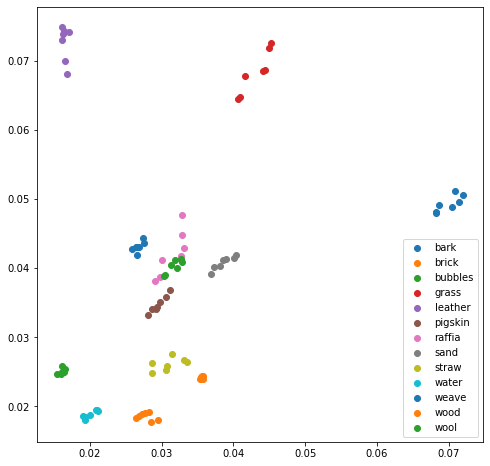

In [103]:
plt.figure(figsize=(8,8))

for l in np.unique(labels):
    inds = np.where([i == l for i in labels])[0]
    plt.scatter(feats[inds,0], feats[inds,1], label=l)

plt.legend()
plt.show()

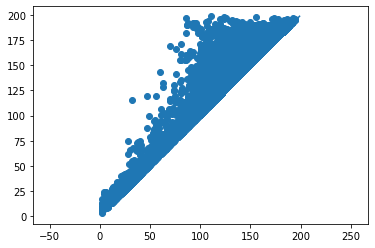

In [66]:
d.plot.plot_diagram(dgms[1])